In [2]:
#importing all libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
#preprocessing of the data
data = pd.read_csv('breast-cancer.csv')
data.drop('id',axis=1,inplace=True)
data.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
data['diagnosis'].replace({'M':1,"B":0}, inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
#setting features for X and Y
X = np.array(data.iloc[:,1:31])
X[568]

array([7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
       0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02, 3.857e-01, 1.428e+00,
       2.548e+00, 1.915e+01, 7.189e-03, 4.660e-03, 0.000e+00, 0.000e+00,
       2.676e-02, 2.783e-03, 9.456e+00, 3.037e+01, 5.916e+01, 2.686e+02,
       8.996e-02, 6.444e-02, 0.000e+00, 0.000e+00, 2.871e-01, 7.039e-02])

In [6]:
#rescalling X
cols = X.shape[1]

for i in range(cols):
  X[:,i] = (X[:,i] - X[:,i].mean())/(X[:,i].max()-X[:,i].min())

cols

30

In [7]:
#assigning output Y
Y = np.array(data.iloc[:,0])
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
#defining the logistic regression model
def logisticRegression(X,Y,alpha,epoch):
  #adding ones column in the X as b/w[0] parameter
  m = X.shape[0]
  n = X.shape[1]
  ones = np.ones((m,1))
  X = np.concatenate((ones,X),axis=1)
  w = np.ones(X.shape[1])

  #defininng the model
  h = 1/(1+np.exp(-1*(np.dot(X,w))))
  cost = np.ones(epoch) 
  #implementing gradient descent
  for i in range(epoch):
    w[0]= w[0] - alpha*(1/m *sum(h-Y))

    for j in range(1,n):
      w[j] = w[j] - alpha *(1/m * sum((h-Y)*X[:,j]))

   # h = 1/(1+np.exp(np.dot(X,w)))
    h = 1/(1+np.exp(-1*(np.dot(X,w))))
    cost[i] = -1/m* sum((Y * np.log(h)) + ((1-Y) * np.log(1-h)))
    #cost = -1/m * np.sum(Y * np.log(h) + (1-Y) * np.log(1-h))
  
  return cost,w



In [26]:
#getting the parameters
cost,w = logisticRegression(X,Y,0.3,5000)
print(cost)
print(w)

[0.4062027  0.39411085 0.38297045 ... 0.07807946 0.07807662 0.07807378]
[-0.65706911  3.56674126  3.39831079  3.41286213  3.20986053  1.45460379
 -0.31196344  1.89747373  3.3860755   0.87565291 -1.99194405  2.99599771
  0.4361672   2.40061895  2.31831148  0.41084115 -2.15745659 -0.30785529
  0.22355983 -0.40953233 -1.43499977  4.6609076   4.66089252  4.19539809
  3.68137044  3.29695452  0.92949368  2.2602336   4.3286273   2.79344783
  1.        ]


In [32]:
X_pred = np.array([1,7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
       0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02, 3.857e-01, 1.428e+00,
       2.548e+00, 1.915e+01, 7.189e-03, 4.660e-03, 0.000e+00, 0.000e+00,
       2.676e-02, 2.783e-03, 9.456e+00, 3.037e+01, 5.916e+01, 2.686e+02,
       8.996e-02, 6.444e-02, 0.000e+00, 0.000e+00, 2.871e-01, 7.039e-02])
Y_pred = 1/(1+np.exp(-1*(np.dot(X_pred,w))))
print(Y_pred)
if(Y_pred >= 0.4):
  print("Malignant")
else:
  print("benign")

1.0
Malignant


### Plotting the cost or loss

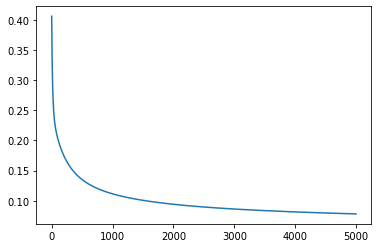

In [31]:
plt.plot(cost)
xlabel = 'iterations/epoch'
ylabel = 'loss or cost'
plt.show()

### Comparison with Sklearn library

In [34]:
from sklearn.linear_model import LogisticRegression
lmd = LogisticRegression()
lmd.fit(X,Y)


LogisticRegression()

In [35]:
lmd.predict([[7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
       0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02, 3.857e-01, 1.428e+00,
       2.548e+00, 1.915e+01, 7.189e-03, 4.660e-03, 0.000e+00, 0.000e+00,
       2.676e-02, 2.783e-03, 9.456e+00, 3.037e+01, 5.916e+01, 2.686e+02,
       8.996e-02, 6.444e-02, 0.000e+00, 0.000e+00, 2.871e-01, 7.039e-02]
])

array([1])

In [14]:
print(lmd.coef_)

[[ 1.89432629  1.7166715   1.85828406  1.60296875  0.65232379  0.33421182
   1.43611359  2.14041977  0.54812862 -0.97908891  1.28478042  0.03878349
   0.98969638  0.84938664  0.05975156 -0.65859446 -0.27111564  0.26883772
  -0.22800366 -0.63949804  2.43322466  2.35995167  2.22382081  1.75956818
   1.57722485  0.77761381  1.38355927  2.7306765   1.33724928  0.3354106 ]]


In [15]:
print(lmd.intercept_)

[-0.67663863]


### Hence our model has shown the near most correct values. 